<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valor-de-acoes---Investimentos-WEG-S.A.-WEG3.SA-/blob/main/Prevendo_valor_de_a%C3%A7%C3%B5es_Investimentos_WEG_S_A_(WEG3_SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prevendo valor de ações - Investimentos `WEG S.A.` (_WEG3.SA_)**
---

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/WEG_Equipamentos_El%C3%A9tricos.svg/1200px-WEG_Equipamentos_El%C3%A9tricos.svg.png' width='500'>

- Website oficial: www.weg.net/br

`WEG S.A` é uma empresa multinacional brasileira com sede na cidade de Jaraguá do Sul, no estado de Santa Catarina.

A empresa é uma das maiores fabricantes de equipamentos elétricos do mundo, atuando nas áreas de comando e proteção, variação de velocidade, automação de processos industriais, geração e distribuição de energia e tintas e vernizes industriais, entre outros produtos.

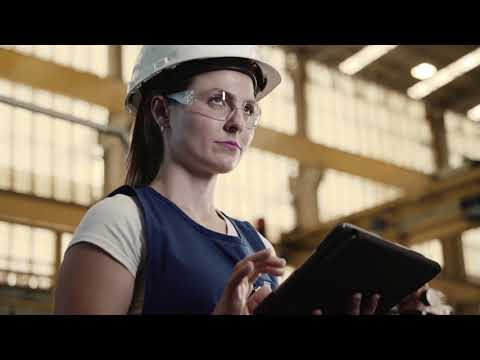

In [1]:
# biblioteca para exibicão de vídeo do YouTube
from IPython.display import YouTubeVideo

# WEG - Vídeo institucional
YouTubeVideo('u5FGUIasTLM', width=720, height=360)

✅ **SAIBA MAIS!**
- https://pt.wikipedia.org/wiki/WEG_S.A.

In [4]:
# função para acessar diretórios/pastas do seu computador para realizar o carregamento do "dataset"
from google.colab import files
data = files.upload()

Saving WEGE3.SA.csv to WEGE3.SA.csv


In [5]:
# visualizando o diretório do google colab e, se o conjunto de dados foi carregado para o ambiente
%ls

sample_data/  WEGE3.SA.csv


In [6]:
# visualizando o conjunto de dados
!head WEGE3.SA.csv

Date,Open,High,Low,Close,Adj Close,Volume
2017-07-24,7.392307,7.473076,7.261538,7.426923,7.051007,2638220
2017-07-25,7.476923,7.476923,7.307692,7.369230,6.996235,2505880
2017-07-26,7.323076,7.442307,7.276923,7.326923,6.956069,2112240
2017-07-27,7.388461,7.419230,7.223076,7.269230,6.901296,1910480
2017-07-28,7.261538,7.296153,7.165384,7.200000,6.835570,2866760
2017-07-31,7.211538,7.303846,7.211538,7.284615,6.915902,2787980
2017-08-01,7.307692,7.480769,7.265384,7.365384,6.992584,4247360
2017-08-02,7.369230,7.569230,7.369230,7.507692,7.127687,5018520
2017-08-03,7.523076,7.561538,7.311538,7.373076,6.999886,3764280


In [7]:
# importando biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [8]:
# importando biblioteca para manipulação e análise de dados
import pandas as pd

In [9]:
# instanciando o conjunto de dados na variável "data" - (dados em inglês)
data = pd.read_csv('/content/WEGE3.SA.csv')
data.head() # visualizando a 5 primeiras observações do objeto "data"

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-24,7.392307,7.473076,7.261538,7.426923,7.051007,2638220.0
1,2017-07-25,7.476923,7.476923,7.307692,7.369230,6.996235,2505880.0
2,2017-07-26,7.323076,7.442307,7.276923,7.326923,6.956069,2112240.0
3,2017-07-27,7.388461,7.419230,7.223076,7.269230,6.901296,1910480.0
4,2017-07-28,7.261538,7.296153,7.165384,7.200000,6.835570,2866760.0


In [10]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       993 non-null    object 
 1   Open       989 non-null    float64
 2   High       989 non-null    float64
 3   Low        989 non-null    float64
 4   Close      989 non-null    float64
 5   Adj Close  989 non-null    float64
 6   Volume     989 non-null    float64
dtypes: float64(6), object(1)
memory usage: 54.4+ KB


Irei instalar a biblioteca [`yfinance`](https://pypi.org/project/yfinance/) para realizar a captura dos dados diretamente do site [Yahoo! Finance](https://finance.yahoo.com/).

In [11]:
# instalando a biblioteca 
!pip install yfinance

     |████████████████████████████████| 63 kB 797 kB/s 
     |████████████████████████████████| 6.4 MB 37.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
# importando a biblioteca para baixar os dados diretamente do site https://finance.yahoo.com/
import yfinance as yf

In [48]:
# importando o conjunto de dados - https://finance.yahoo.com/quote/WEGE3.SA?p=WEGE3.SA&.tsrc=fin-srch
data_WEG = 'WEGE3.SA' # WEG S.A.

In [49]:
# instanciando o conjunto de dados no objeto "df"
df_WEG = yf.download(data_WEG).reset_index()

[*********************100%***********************]  1 of 1 completed


In [50]:
# visualizando o tipo do objeto criado
type(df_WEG)

pandas.core.frame.DataFrame

In [51]:
# visualizando as 5 primeiras observações
df_WEG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.168639,0.170118,0.168639,0.168639,0.125042,378560
1,2000-01-04,0.164201,0.164201,0.162721,0.162721,0.120654,47320
2,2000-01-05,0.162721,0.162721,0.162721,0.162721,0.120654,0
3,2000-01-06,0.147928,0.147928,0.147928,0.147928,0.109685,250120
4,2000-01-07,0.149408,0.149408,0.147928,0.147928,0.109685,135200


In [52]:
# visualizando as 5 últimas observações
df_WEG.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5613,2022-05-06,28.090000,28.090000,26.930000,27.150000,27.150000,13021900
5614,2022-05-09,26.900000,27.500000,26.629999,26.660000,26.660000,10148000
5615,2022-05-10,26.959999,27.059999,26.040001,26.120001,26.120001,8285600
5616,2022-05-11,26.120001,26.400000,25.900000,26.100000,26.100000,8726100
5617,2022-05-12,26.110001,26.180000,25.809999,26.090000,26.090000,1340600


In [53]:
# dimensão do conjunto de dados
print(f'Dimensão do dataset: \n{df_WEG.shape[0]} linhas e {df_WEG.shape[1]} colunas.')

Dimensão do dataset: 
5618 linhas e 7 colunas.


In [54]:
# visualizando o tipo de dados de cada coluna
df_WEG.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [55]:
# visualizando a data inicial e final
df_WEG['Date'].min(), df_WEG['Date'].max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2022-05-12 00:00:00'))

In [56]:
# contabilizando valores únicos em cada coluna
df_WEG.nunique()

Date         5618
Open         2435
High         2484
Low          2468
Close        2365
Adj Close    3305
Volume       3529
dtype: int64

In [57]:
# visualizando a presença de valores nulos e/ou faltantes
df_WEG.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
# criando uma cópia do conjunto de dados para realizarmos a manipulação do mesmo
df_copy = df_WEG.copy()
df_copy.head()  # visualizando as 5 primeiras observações da cópia do conjunto de dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.168639,0.170118,0.168639,0.168639,0.125042,378560
1,2000-01-04,0.164201,0.164201,0.162721,0.162721,0.120654,47320
2,2000-01-05,0.162721,0.162721,0.162721,0.162721,0.120654,0
3,2000-01-06,0.147928,0.147928,0.147928,0.147928,0.109685,250120
4,2000-01-07,0.149408,0.149408,0.147928,0.147928,0.109685,135200


In [59]:
# definindo o índice do conjunto de dados como sendo a coluna "Date"
df_copy.index = df_copy['Date']

# removendo a coluna "Date"
df_copy = df_copy.drop('Date', axis='columns')

In [60]:
# visualizando as colunas presentes no conjunto de dados após sua manipulação
df_copy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

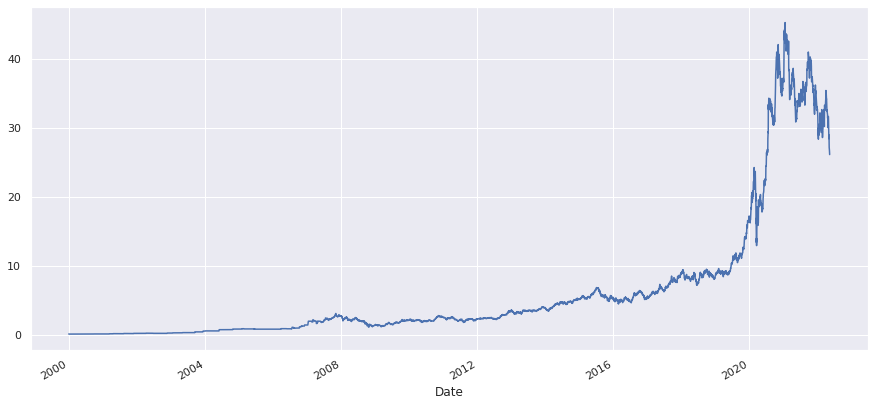

In [61]:
# plotando gráfico do histórico da série temporal em relação ao preço ajustado (Adj Close)
df_copy['Adj Close'].iloc[:-1].plot(figsize=(15,7));

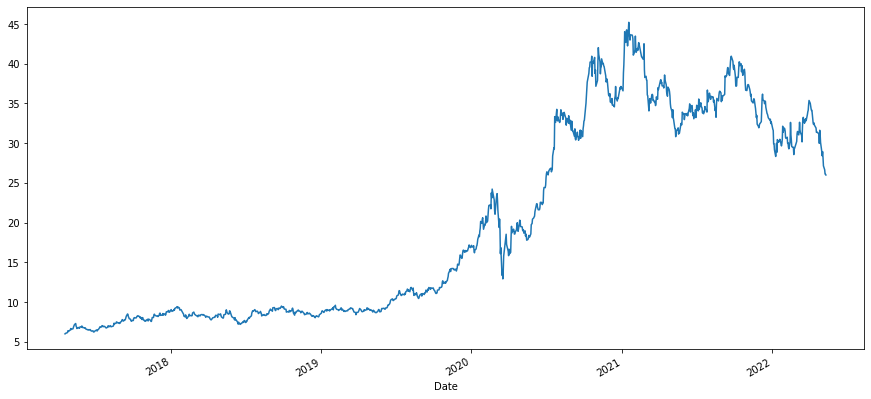

In [27]:
# visualizando o histórico da série temporal do último 5 anos, ou seja, 
# aproximadamente 1.260 dias úteis até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-1260:].plot(figsize=(15,7));

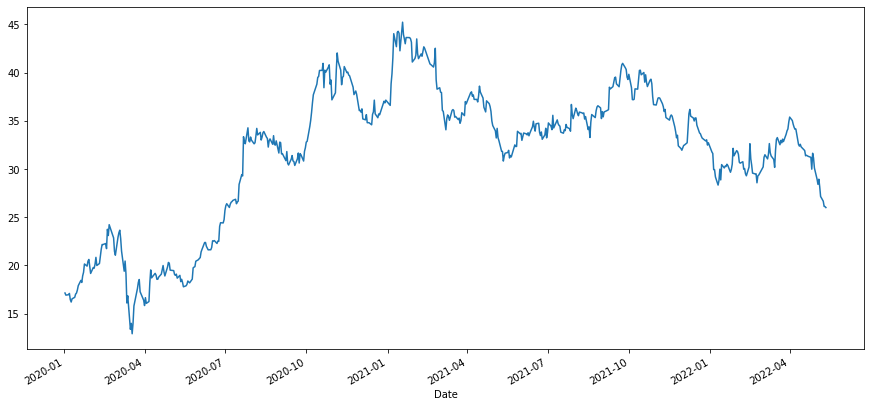

In [28]:
# visualizando o histórico da série temporal do início de 2020 até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].loc['2020-01-01':].plot(figsize=(15,7));

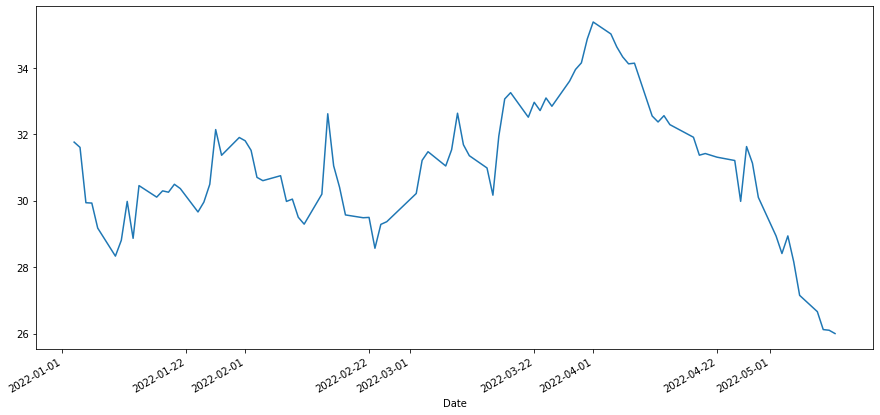

In [29]:
# visualizando o histórico da série temporal do início desse ano (2022) até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].loc['2022-01-01':].plot(figsize=(15,7));

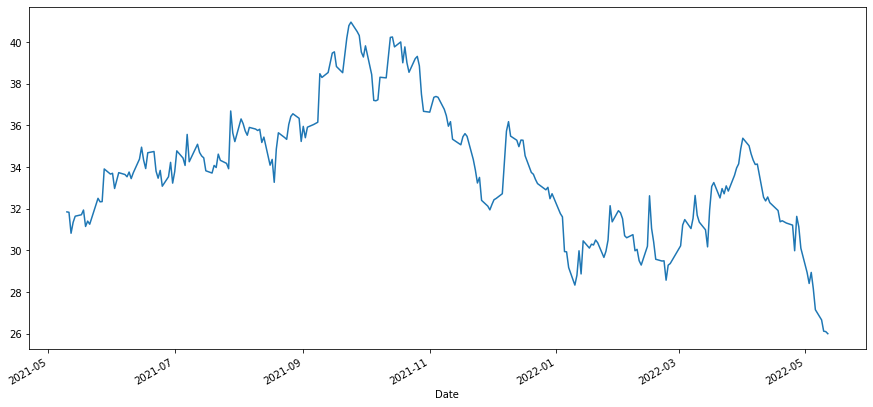

In [30]:
# visualizando o histórico da série temporal de 252 dias úteis (1 ano) até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-252:].plot(figsize=(15,7));

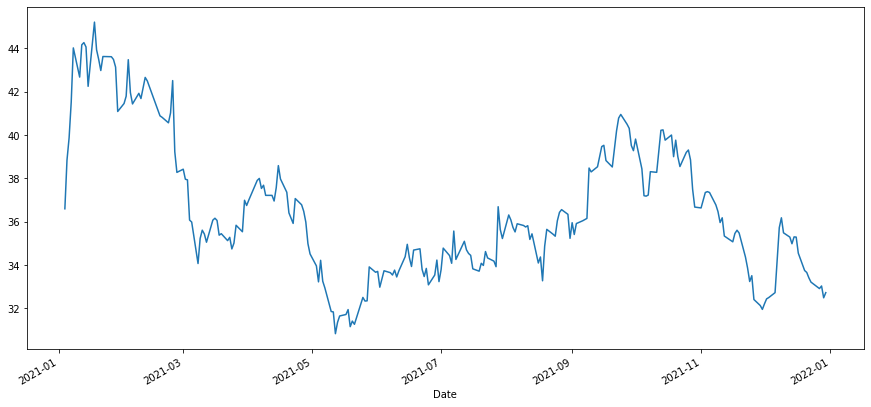

In [31]:
# visualizando o histórico da série temporal somente do ano de 2021
df_copy['Adj Close'].loc['2021-01-01':'2021-12-31'].plot(figsize=(15,7));

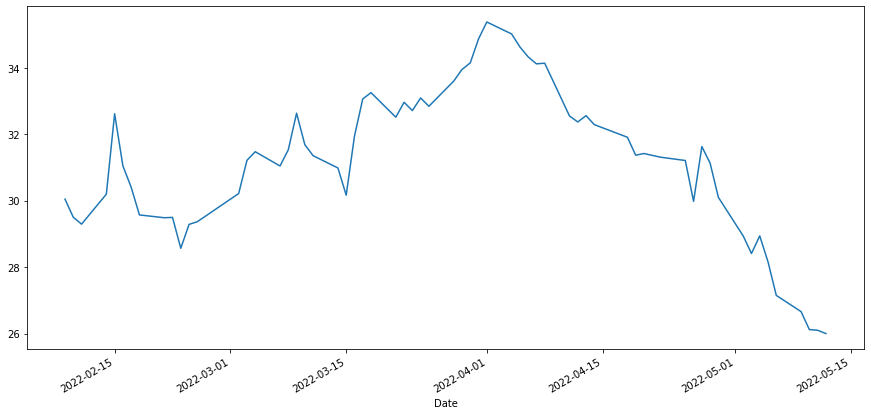

In [32]:
# visualizando o histórico da série temporal dos últimos 63 dias úteis (3 meses) do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-63:].plot(figsize=(15,7));

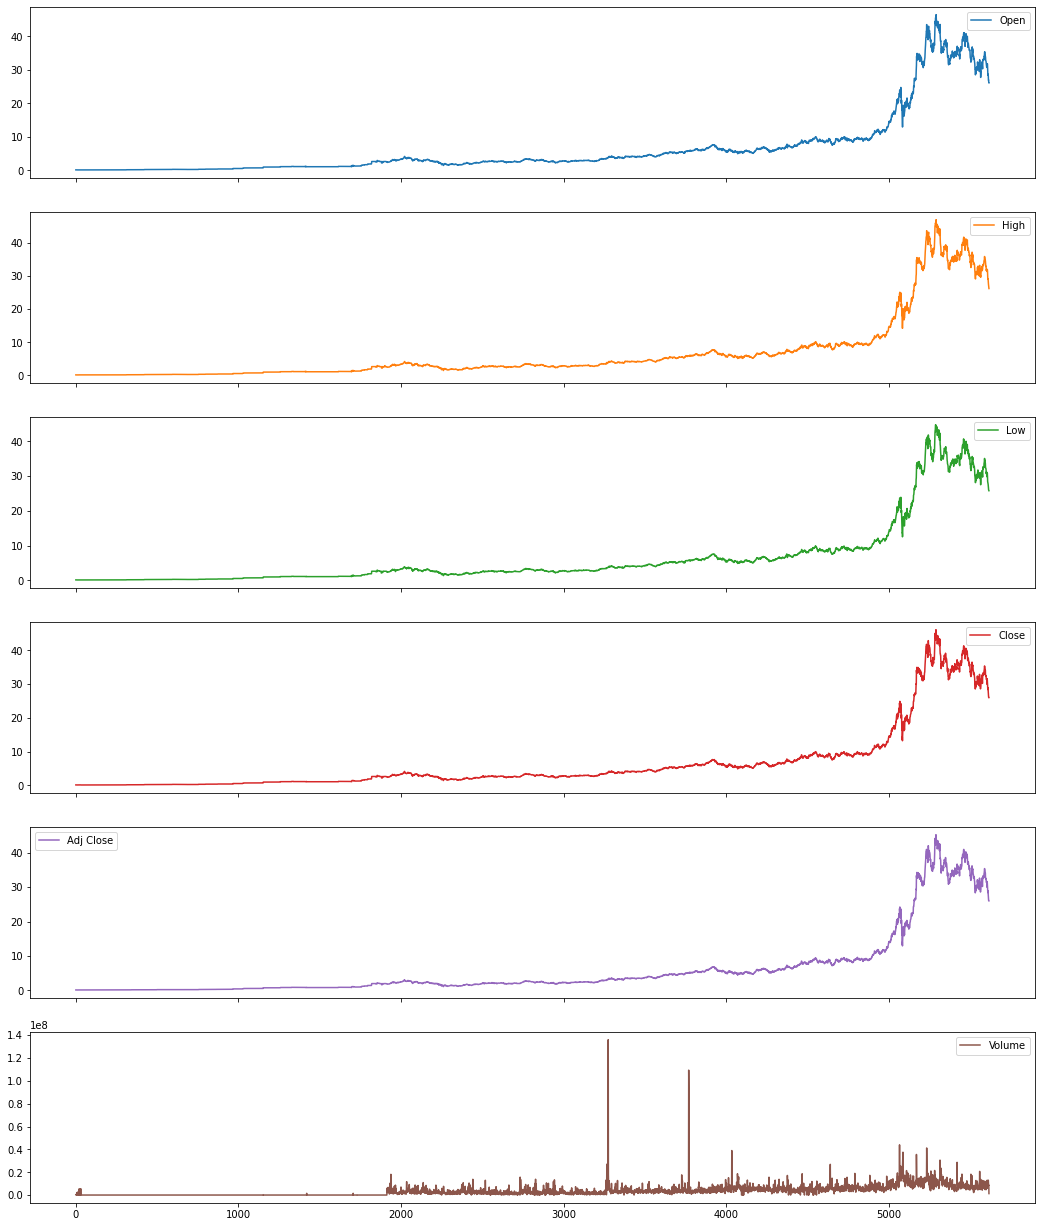

In [33]:
# instanciando as colunas de interesse 
feats = (df_WEG.columns[1:]) # excluindo a primeira coluna, nesse caso a "Date"

# plotando gráfico da série temporal
df_WEG[feats].plot(subplots=True, figsize=(18,22));

In [34]:
# importando bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando ambiente de exibição
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
sns.set()

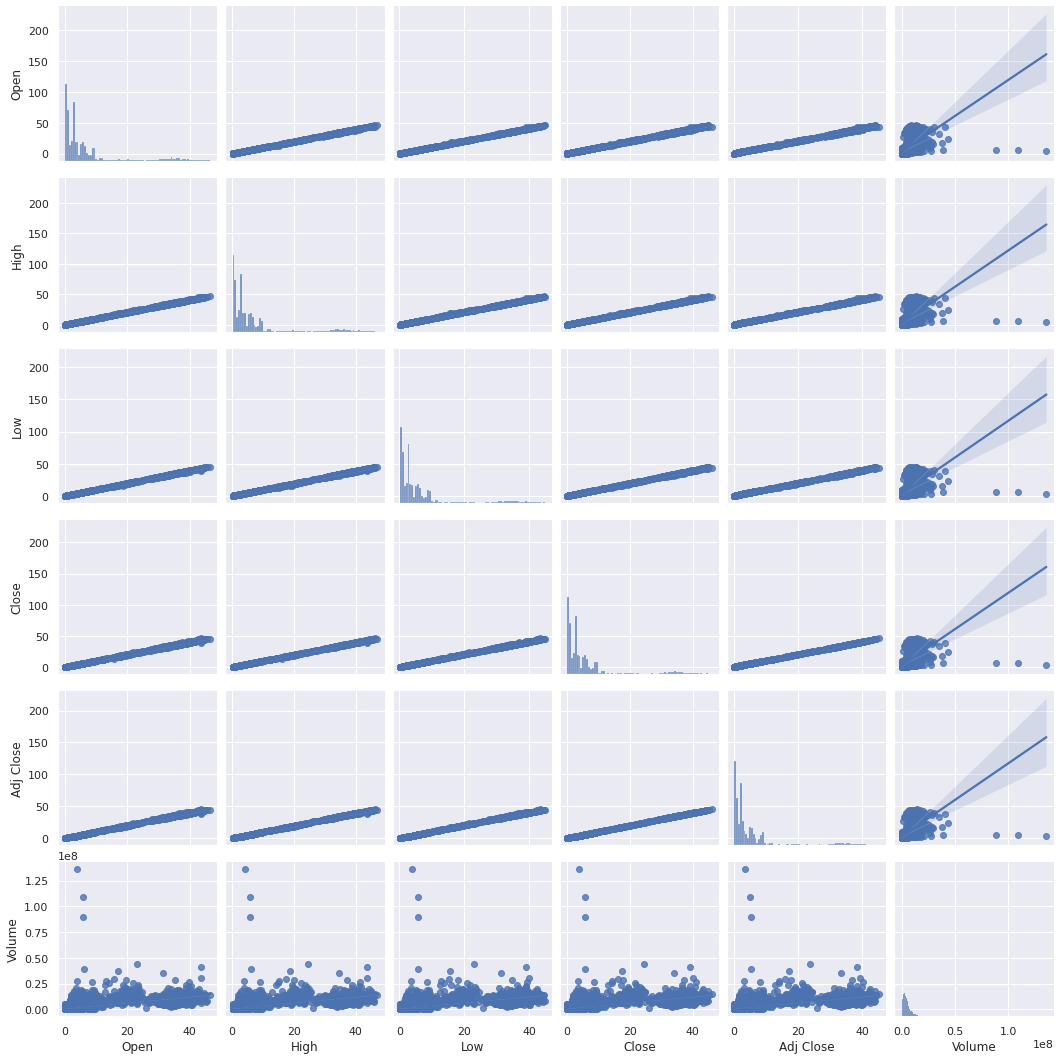

In [35]:
# plotando mural de gráficos
sns.pairplot(df_WEG, kind='reg');

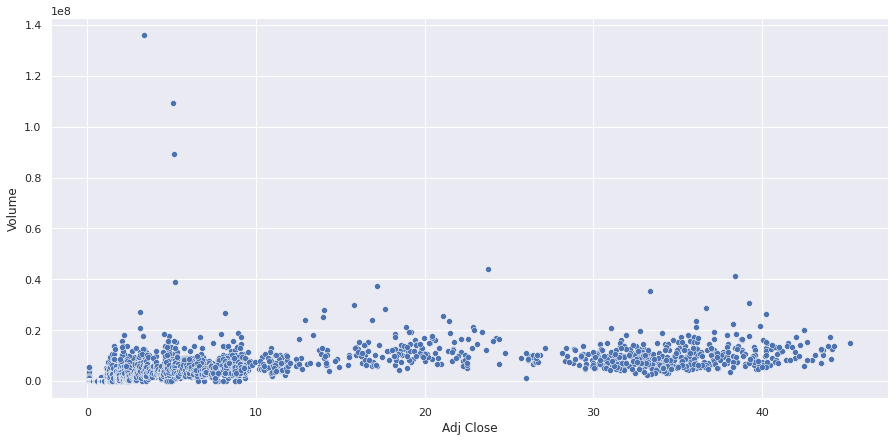

In [36]:
# gráfico de dispersão - "Adj Close" vs "Volume"
# plt.figure=(16, 7)
sns.scatterplot(data=df_WEG, x='Adj Close', y='Volume');

In [37]:
# correlação entre as variáveis
df_WEG.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999851,0.999840,0.999630,0.999362,0.581262
High,0.999851,1.000000,0.999825,0.999839,0.999565,0.584389
Low,0.999840,0.999825,1.000000,0.999843,0.999565,0.579030
Close,0.999630,0.999839,0.999843,1.000000,0.999720,0.581701
Adj Close,0.999362,0.999565,0.999565,0.999720,1.000000,0.576788
Volume,0.581262,0.584389,0.579030,0.581701,0.576788,1.000000


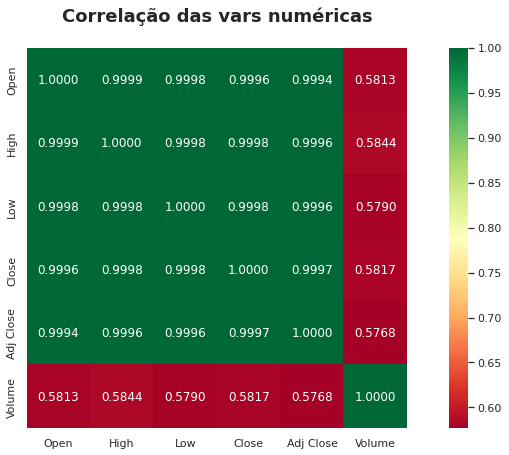

In [38]:
# gráfico de calor da correlação das variáveis numéricas
# plt.figure(figsize=(10,10))
sns.heatmap(df_WEG.corr(), cmap='RdYlGn', annot=True, square=True, fmt='.4f')
plt.title('Correlação das vars numéricas\n', 
          {'fontsize': 18, 'fontweight': 'bold'});

In [62]:
# realizando um ponto de corte da correlação entre as variáveis somente maior e/ou igual a 0.5
vars_num_corr = df_WEG.corr()['Adj Close'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.5].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Adj Close). \nSegue:')
important_feats

Há 5 atributos com forte correlação com a variável alvo (Adj Close). 
Segue:


Adj Close    1.000000
Close        0.999720
High         0.999565
Low          0.999565
Open         0.999362
Name: Adj Close, dtype: float64

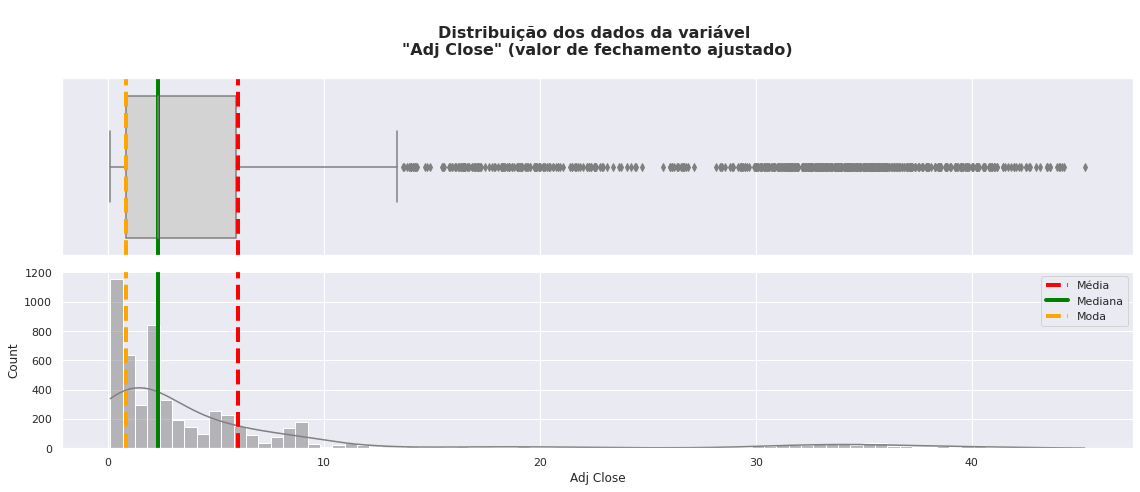

In [40]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Adj Close" (valor de fechamento ajustado)
mean = df_WEG['Adj Close'].mean()
median = df_WEG['Adj Close'].median()
mode = df_WEG['Adj Close'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=df_WEG, x='Adj Close', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Adj Close" (valor de fechamento ajustado)\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=df_WEG, x='Adj Close', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [63]:
# instanciando os atributos "Date" e "Adj Close" na variável "df_close"
df_close_date = df_WEG[['Date', 'Adj Close']]

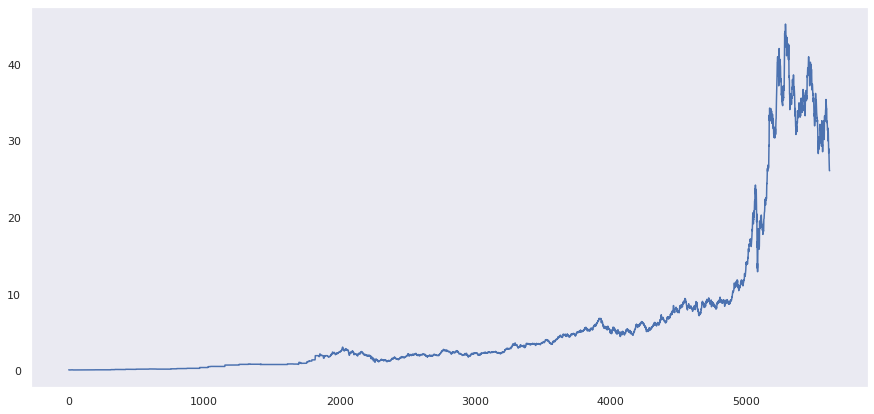

In [64]:
# gráfico de linha da série temporal
df_close_date['Adj Close'].plot(secondary_y=data_WEG, figsize=(15,7));

In [65]:
# criando novos atributos para "Adj Close" (fechamento ajustado)
df_WEG['5-day moving average'] = df_WEG['Adj Close'].rolling(5).mean()      # média móvel de 5 dias
df_WEG['15-day moving average'] = df_WEG['Adj Close'].rolling(15).mean()    # média móvel de 15 dias
df_WEG['30-day moving average'] = df_WEG['Adj Close'].rolling(30).mean()    # média móvel de 30 dias
df_WEG['45-day moving average'] = df_WEG['Adj Close'].rolling(45).mean()    # média móvel de 45 dias

In [66]:
# visualizando os 20 últimos atributos
df_WEG[['5-day moving average', '15-day moving average', 
        '30-day moving average', '45-day moving average']].tail(20)

,5-day moving average,15-day moving average,30-day moving average,45-day moving average
5598,33.148000,33.840413,32.871684,31.894128
5599,32.782000,33.786883,32.907515,31.945497
5600,32.336000,33.724667,32.922023,31.986878
5601,32.100000,33.576000,32.932848,32.028383
5602,31.910001,33.407334,32.929025,32.075629
5603,31.660000,33.218000,32.884909,32.100370
5604,31.444000,32.974000,32.869091,32.069100
5605,31.058000,32.614000,32.823261,32.045327
5606,31.109999,32.388000,32.844751,32.072550
5607,31.051999,32.154667,32.876876,32.107179


In [67]:
# contabilizando valores nulos presente na base de dados
df_WEG.isnull().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
5-day moving average      4
15-day moving average    14
30-day moving average    29
45-day moving average    44
dtype: int64

In [68]:
# ajustando o valor de fechamento para o dia posterior
df_WEG['Adj Close'] = df_WEG['Adj Close'].shift(-1)

In [69]:
# visualizando a base da dados
df_WEG

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,30-day moving average,45-day moving average
0,2000-01-03,0.168639,0.170118,0.168639,0.168639,0.120654,378560,NaN,NaN,NaN,NaN
1,2000-01-04,0.164201,0.164201,0.162721,0.162721,0.120654,47320,NaN,NaN,NaN,NaN
2,2000-01-05,0.162721,0.162721,0.162721,0.162721,0.109685,0,NaN,NaN,NaN,NaN
3,2000-01-06,0.147928,0.147928,0.147928,0.147928,0.109685,250120,NaN,NaN,NaN,NaN
4,2000-01-07,0.149408,0.149408,0.147928,0.147928,0.109685,135200,0.117144,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5613,2022-05-06,28.090000,28.090000,26.930000,27.150000,26.660000,13021900,28.320000,30.263333,32.051873,32.002234
5614,2022-05-09,26.900000,27.500000,26.629999,26.660000,26.120001,10148000,27.864000,29.888000,31.837441,31.901010
5615,2022-05-10,26.959999,27.059999,26.040001,26.120001,26.100000,8285600,27.406000,29.502000,31.613333,31.782015
5616,2022-05-11,26.120001,26.400000,25.900000,26.100000,26.090000,8726100,26.838000,29.150667,31.363333,31.672121


In [70]:
# percentual de dados nulos/ausentes em relação ao total de dados da base
((df_WEG.isnull().sum() / len(df_WEG)) * 100).round(2)

Date                     0.00
Open                     0.00
High                     0.00
Low                      0.00
Close                    0.00
Adj Close                0.02
Volume                   0.00
5-day moving average     0.07
15-day moving average    0.25
30-day moving average    0.52
45-day moving average    0.78
dtype: float64

In [71]:
# removendo valores nulos/ausentes da base de dados
df_WEG.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
df_WEG.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [72]:
# instanciando os atributos "Date", "Adj Close", "5-day moving average", "15-day moving average", 
# "30-day moving average" e "45-day moving average" na variável "df_close2"
df_close2 = df_WEG[['Date', 'Adj Close', '5-day moving average', 
                     '15-day moving average', '30-day moving average', '45-day moving average']]

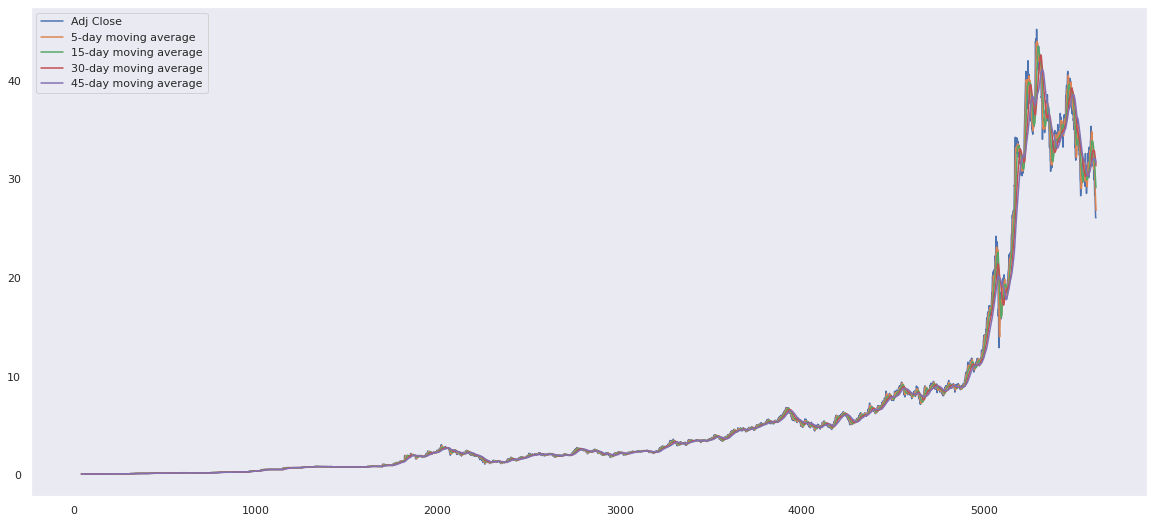

In [73]:
# gráfico de linha da série temporal:
# "Adj Close", "5-day moving average", "15-day moving average", "30-day moving average" e "45-day moving average"valor ajustado
df_close2[['Adj Close', '5-day moving average', 
          '15-day moving average', '30-day moving average', 
           '45-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

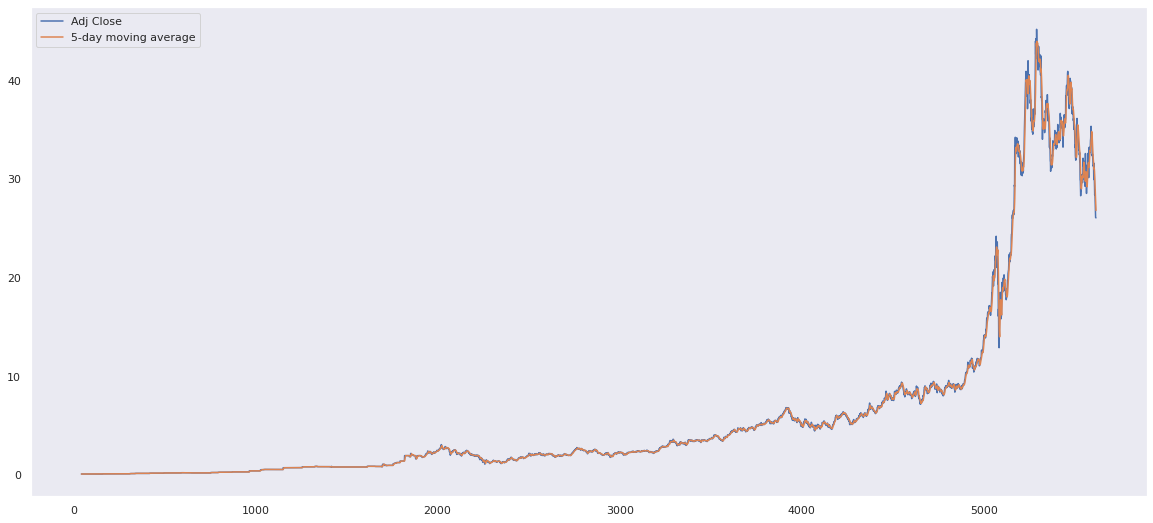

In [74]:
# gráfico de linha da série temporal:
# "Adj Close" e "5-day moving average"
df_close2[['Adj Close', '5-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

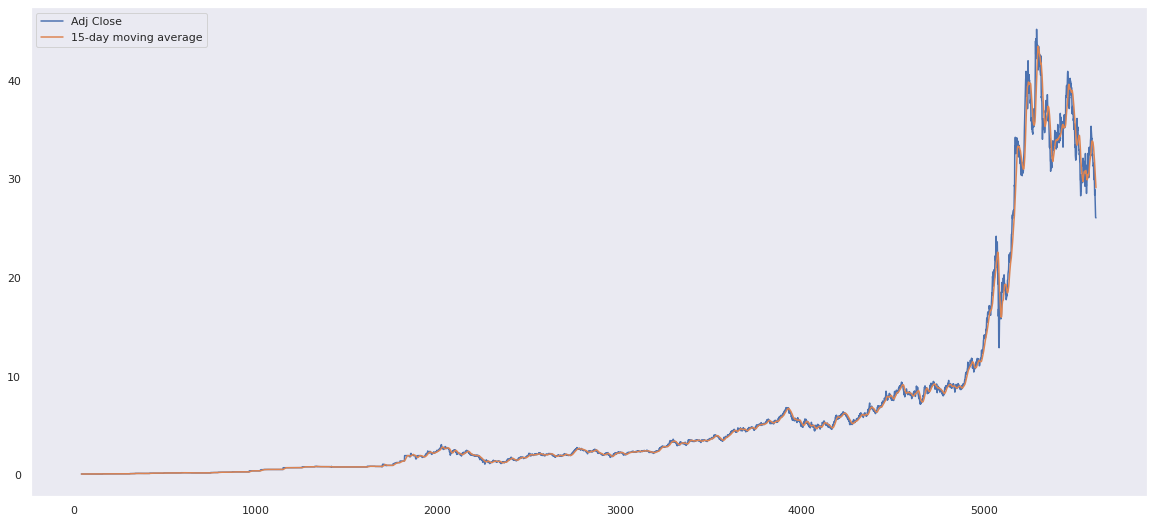

In [75]:
# gráfico de linha da série temporal
# "Adj Close" e "15-day moving average"
df_close2[['Adj Close', '15-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

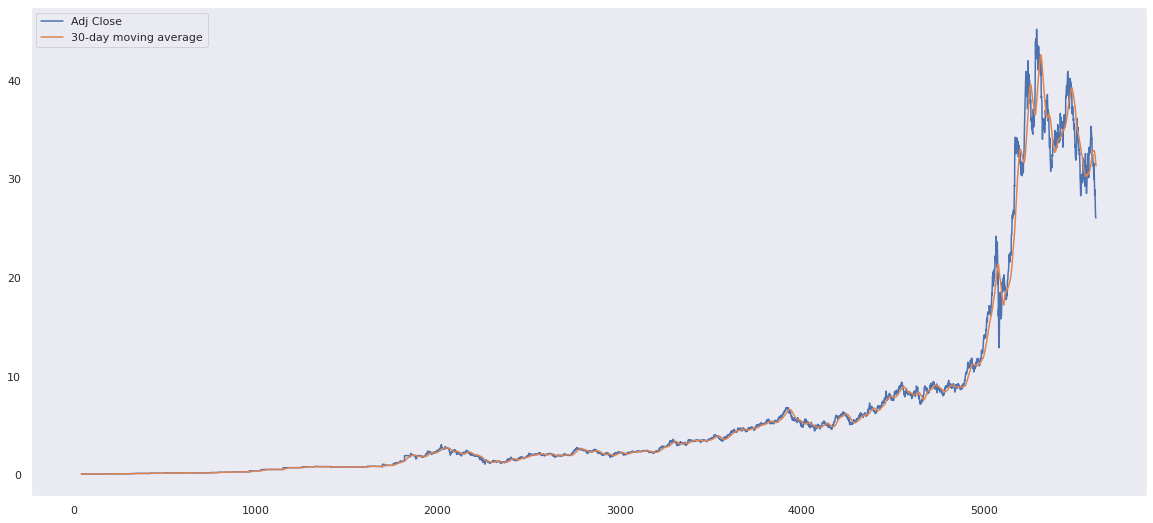

In [76]:
# gráfico de linha da série temporal
# "Adj Close" e "30-day moving average"
df_close2[['Adj Close', '30-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

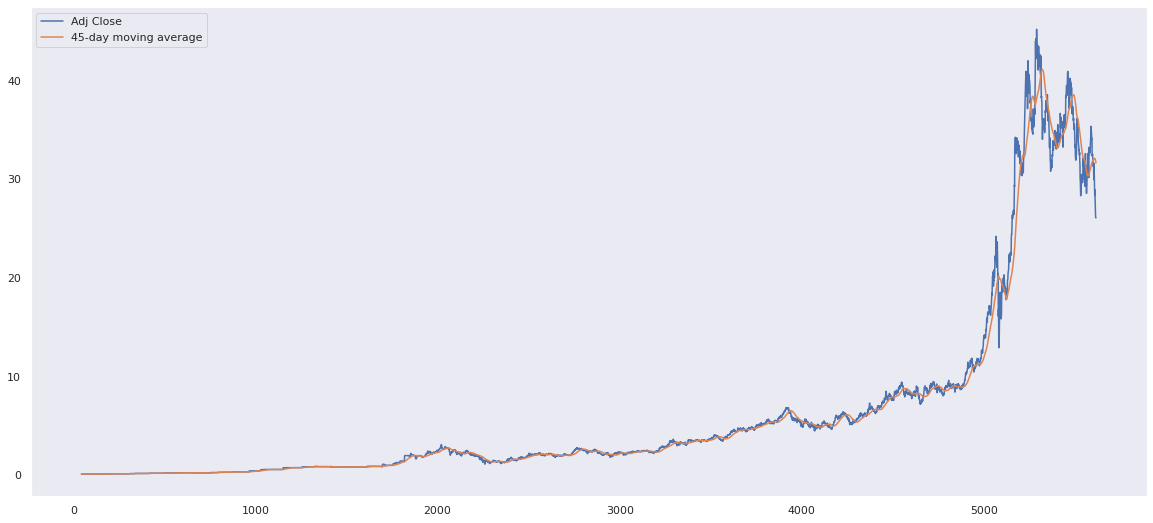

In [77]:
# gráfico de linha da série temporal
# "Adj Close" e "45-day moving average"
df_close2[['Adj Close', '45-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

In [78]:
# dimensão da base de dados
df_WEG.shape   # linhas e colunas

(5573, 11)

In [79]:
# separando a quantidade linhas de treino, validaçao e teste
linhas_df = df_WEG.shape[0]

linhas_treino = round(linhas_df * 0.7)
linhas_validacao = round(linhas_df * 0.2)
linhas_teste = round(linhas_df * 0.1) - 1

print(
    '[INFO]:\n'
    f'- Linhas da base de dados: {linhas_df}',
    f'- Linhas de treino (70%) = {linhas_treino} | Índices = 0:{linhas_treino}', 
    f'- Linhas de validação (20%) =  {linhas_validacao} | Índices = {linhas_treino}:{linhas_treino + linhas_validacao}',
    f'- Linhas de teste (10%) = {linhas_teste} | Índices = {linhas_treino + linhas_validacao}:{linhas_df}',
    sep='\n'
)

[INFO]:
- Linhas da base de dados: 5573
- Linhas de treino (70%) = 3901 | Índices = 0:3901
- Linhas de validação (20%) =  1115 | Índices = 3901:5016
- Linhas de teste (10%) = 556 | Índices = 5016:5573


In [80]:
# visualizando a quantidade de observações em cada particionamento
linhas_treino, linhas_validacao, linhas_teste

(3901, 1115, 556)

In [81]:
# instanciando a quantidade dos dados de treino, validação e teste
train_data = linhas_treino  # 3901
val_data = linhas_validacao # 1115
test_data = linhas_teste    # 556

print(
    f'Qtde de dados de treino: {train_data}', 
    f'Qtde de dados de validação: {val_data}', 
    f'Qtde de dados de treino: {test_data}',
    sep='\n')

print('Total geral:', train_data + val_data + test_data)

Qtde de dados de treino: 3901
Qtde de dados de validação: 1115
Qtde de dados de treino: 556
Total geral: 5572


In [82]:
# reindexando o índice da base de dados
df_WEG = df_WEG.reset_index(drop=True)
df_WEG

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,30-day moving average,45-day moving average
0,2000-03-03,0.147928,0.147928,0.147928,0.147928,0.109685,0,0.109685,0.110636,0.115864,0.115657
1,2000-03-06,0.147928,0.147928,0.147928,0.147928,0.109685,0,0.109685,0.109685,0.115755,0.115316
2,2000-03-07,0.147928,0.147928,0.147928,0.147928,0.109685,0,0.109685,0.109685,0.115645,0.115072
3,2000-03-08,0.147928,0.147928,0.147928,0.147928,0.109685,0,0.109685,0.109685,0.115279,0.114828
4,2000-03-09,0.147928,0.147928,0.147928,0.147928,0.109685,0,0.109685,0.109685,0.114877,0.114828
...,...,...,...,...,...,...,...,...,...,...,...
5568,2022-05-05,28.700001,28.879999,27.670000,28.160000,27.150000,11077900,28.910000,30.624000,32.237319,32.070371
5569,2022-05-06,28.090000,28.090000,26.930000,27.150000,26.660000,13021900,28.320000,30.263333,32.051873,32.002234
5570,2022-05-09,26.900000,27.500000,26.629999,26.660000,26.120001,10148000,27.864000,29.888000,31.837441,31.901010
5571,2022-05-10,26.959999,27.059999,26.040001,26.120001,26.100000,8285600,27.406000,29.502000,31.613333,31.782015


In [83]:
# instanciando as variáveis explicativas (X) e a variável resposta (y)
X = df_WEG.drop(['Date', 'Adj Close'], axis=1)
y = df_WEG['Adj Close']

# tamanho das variáveis
len(X), len(y)

(5573, 5573)

In [84]:
# biblioteca para recursos matemáticos
import numpy as np

# visualizando os 5 primeiros dados da variável X e y
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head()}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
       Open      High       Low     Close  Volume  5-day moving average  \
0  0.147928  0.147928  0.147928  0.147928       0              0.109685   
1  0.147928  0.147928  0.147928  0.147928       0              0.109685   
2  0.147928  0.147928  0.147928  0.147928       0              0.109685   
3  0.147928  0.147928  0.147928  0.147928       0              0.109685   
4  0.147928  0.147928  0.147928  0.147928       0              0.109685   

   15-day moving average  30-day moving average  45-day moving average  
0               0.110636               0.115864               0.115657  
1               0.109685               0.115755               0.115316  
2               0.109685               0.115645               0.115072  
3               0.109685               0.115279               0.114828  
4               0.109685               0.114877               0.114828  

Variável resposta (y): 
[0.10968507 0.10968507 

In [85]:
# função para escolher os melhores atributos
from sklearn.feature_selection import SelectKBest

# instanciando o objeto
k_best_feats = SelectKBest(k='all')

In [86]:
# criando uma lista com os atributos da variável explicativas
feats_list = list(X.columns)
print(feats_list)

['Open', 'High', 'Low', 'Close', 'Volume', '5-day moving average', '15-day moving average', '30-day moving average', '45-day moving average']


In [87]:
# treinando e transformando com o objeto os dados da variável explicativa
k_best_feats.fit_transform(X, y)

# instanciando as melhores métricas
k_best_feats_scores = k_best_feats.scores_

In [88]:
# concatenando os atributos e seus respectivos valores (peso de importância)
raw_pairs = zip(feats_list[1:], k_best_feats_scores)

# ordenando a lista de maior para o menor valores (peso de importância)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [89]:
# instanciando a lista com os pesos da importância dos atributos em um dicionário
k_best_feats_final = dict(ordered_pairs[:15])
best_feats = k_best_feats_final.keys()

# imprimindo os resultados
print(
    'Melhores atributos (features):\n'
    f'{k_best_feats_final}'
)

Melhores atributos (features):
{'Volume': 24343.175573748136, '15-day moving average': 20493.26142579553, 'Low': 17060.106961100693, 'Close': 16674.4148455426, 'High': 14521.882476172714, '30-day moving average': 9510.15109894142, '45-day moving average': 7166.039196197477, '5-day moving average': 14.657129788643518}


In [90]:
# nome das colunas
df_WEG.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '5-day moving average', '15-day moving average',
       '30-day moving average', '45-day moving average'],
      dtype='object')

In [91]:
# atributos com maior grau de importância
best_feats

dict_keys(['Volume', '15-day moving average', 'Low', 'Close', 'High', '30-day moving average', '45-day moving average', '5-day moving average'])

In [95]:
# visualizando as "features" mais importante e suas respectivas pontuações
list(k_best_feats_final.keys()), list(k_best_feats_final.values())

(['Volume',
  '15-day moving average',
  'Low',
  'Close',
  'High',
  '30-day moving average',
  '45-day moving average',
  '5-day moving average'],
 [24343.175573748136,
  20493.26142579553,
  17060.106961100693,
  16674.4148455426,
  14521.882476172714,
  9510.15109894142,
  7166.039196197477,
  14.657129788643518])

In [96]:
feats_selection = list(k_best_feats_final.keys())[-1:]
feats_selection

['5-day moving average']

In [97]:
# instanciando os atributos com maior importância e para isso iremos eliminar algumas "features"
feats_importance = df_WEG.drop(['Date', 'Open', 'Adj Close', 
                                 '5-day moving average'], axis=1)

# feats_importance = df_WEG.drop(feats_selection, axis=1)


# visualizando os atributos selecionados
feats_importance

,High,Low,Close,Volume,15-day moving average,30-day moving average,45-day moving average
0,0.147928,0.147928,0.147928,0,0.110636,0.115864,0.115657
1,0.147928,0.147928,0.147928,0,0.109685,0.115755,0.115316
2,0.147928,0.147928,0.147928,0,0.109685,0.115645,0.115072
3,0.147928,0.147928,0.147928,0,0.109685,0.115279,0.114828
4,0.147928,0.147928,0.147928,0,0.109685,0.114877,0.114828
...,...,...,...,...,...,...,...
5568,28.879999,27.670000,28.160000,11077900,30.624000,32.237319,32.070371
5569,28.090000,26.930000,27.150000,13021900,30.263333,32.051873,32.002234
5570,27.500000,26.629999,26.660000,10148000,29.888000,31.837441,31.901010
5571,27.059999,26.040001,26.120001,8285600,29.502000,31.613333,31.782015


In [98]:
# normalizando os dados de entradas da seleção dos atributos acima

# biblioteca para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando o objeto e realizando o treinamento da normalização dos dados da variável "feats_importance"
scaler = MinMaxScaler()
feats_scaled = scaler.fit_transform(feats_importance)

print(
    f'Dados normalizados: {feats_scaled.shape[0]} linhas e {feats_scaled.shape[1]} colunas.',
    feats_scaled,
    sep='\n\n'
)

Dados normalizados: 5573 linhas e 7 colunas.

[[1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.48281025e-04
  2.74432410e-04 2.79093207e-04]
 [1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.26374469e-04
  2.71851414e-04 2.70779283e-04]
 [1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.26374469e-04
  2.69270417e-04 2.64841043e-04]
 ...
 [5.84735604e-01 5.93143376e-01 5.76955837e-01 ... 6.86348910e-01
  7.46682642e-01 7.74644067e-01]
 [5.75331767e-01 5.79932331e-01 5.65207653e-01 ... 6.77453784e-01
  7.41409386e-01 7.71745077e-01]
 [5.61226032e-01 5.76797468e-01 5.64772525e-01 ... 6.69357528e-01
  7.35526891e-01 7.69067795e-01]]


In [99]:
# quantidade de dados da variável "feats_scaled"
len(feats_scaled)

5573

In [100]:
# # instanciando os dados de treino e validação 
# X_train = feats_scaled[0:3842]
# X_val = feats_scaled[3842:4940]

# y_train = y[0:3842]
# y_val = y[3842:4940]

# print(
#     '\tDados',
#     '\n++++++++++++++++++++'
#     '\n             X | y'
#     '\nTreino   :', len(X_train), len(y_train), 
#     '\nValidação:', len(X_val), len(y_val)
# )

In [101]:
# instanciando os dados de treino e validação 
X_train = feats_scaled[0:linhas_treino]
X_val = feats_scaled[linhas_treino:(linhas_treino + linhas_validacao)]

y_train = y[0:linhas_treino]
y_val = y[linhas_treino:(linhas_treino + linhas_validacao)]

print(
    '\tDados',
    '\n++++++++++++++++++++'
    '\n             X | y'
    '\nTreino   :', len(X_train), len(y_train), 
    '\nValidação:', len(X_val), len(y_val)
)

	Dados 
++++++++++++++++++++
             X | y
Treino   : 3901 3901 
Validação: 1115 1115


In [102]:
print(
    '5 amostras dos dados de treino',
    f'X: \n{X_train[:5]}',
    f'y: \n{y_train[:5]}',
    sep='\n\n'
)

5 amostras dos dados de treino

X: 
[[0.00015807 0.00016561 0.00016091 0.         0.00014828 0.00027443
  0.00027909]
 [0.00015807 0.00016561 0.00016091 0.         0.00012637 0.00027185
  0.00027078]
 [0.00015807 0.00016561 0.00016091 0.         0.00012637 0.00026927
  0.00026484]
 [0.00015807 0.00016561 0.00016091 0.         0.00012637 0.00026067
  0.0002589 ]
 [0.00015807 0.00016561 0.00016091 0.         0.00012637 0.0002512
  0.0002589 ]]

y: 
0    0.109685
1    0.109685
2    0.109685
3    0.109685
4    0.109685
Name: Adj Close, dtype: float64


In [103]:
print(
    '5 amostras dos dados de validação',
    f'X: \n{X_val[:5]}',
    f'y: \n{y_val[:5]}',
    sep='\n\n'
)

5 amostras dos dados de validação

X: 
[[0.14380796 0.14429378 0.14337678 0.05870329 0.14193354 0.15060368
  0.15598029]
 [0.14249275 0.1448105  0.1432094  0.01991374 0.14150567 0.14994764
  0.15585132]
 [0.14413677 0.13895421 0.13609689 0.02977121 0.14063936 0.14912413
  0.15553825]
 [0.13756068 0.13628445 0.13802146 0.03019938 0.13966213 0.14841097
  0.15525505]
 [0.13484803 0.13206448 0.13517646 0.06575472 0.1384736  0.14758733
  0.15486605]]

y: 
3901    6.010278
3902    5.718016
3903    5.797099
3904    5.680195
3905    5.552973
Name: Adj Close, dtype: float64


In [104]:
# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
l_reg = LinearRegression()

# realizando o treinamento e a predição com o modelo instanciado
l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Regressão Linear',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Regressão Linear 
Coeficiente de determinação: 98.24%


In [105]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo
mlp_reg = MLPRegressor(max_iter=500, learning_rate='adaptive', alpha=0.0009)

# realizando o treinamento e a predição com o modelo instanciado
mlp_reg.fit(X_train, y_train)
pred = mlp_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Rede Neural Simples',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Rede Neural Simples 
Coeficiente de determinação: 79.73%


In [106]:
# instanciando um dicionário com hiperparâmetros
params = {
    'hidden_layer_sizes': [(i, ) for i in list(range(1, 21))],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# visualizando os dados do dicionário instanciado
params

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,),
  (14,),
  (15,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [107]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo com 500 iterações
# mlp_reg = MLPRegressor(max_iter=500, learning_rate='adaptive', alpha=0.0009)
mlp_reg = MLPRegressor(max_iter=500)

# função de procura dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# instanciando o objeto "search" e aplicando a função "GridSearchCV" com os seguintes argumentos:
# modelo instanciado, dicionário de parâmetros, número de núcleos , validação cruzada
search = GridSearchCV(mlp_reg, params, n_jobs=-1, cv=5)

# visualizando o objeto com seus parâmetros
search

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [108]:
# realizando o treinamento do objeto "search" com os dados de treino (X_train, y_train)
search.fit(X_train, y_train)

# instanciando os melhores parâmetros
clf = search.best_estimator_
print(clf)  # visualizando o resultado dos melhores parâmetros

# realizando a predição com os dados de validação (X_val)
pred = search.predict(X_val)

# realizando avalição do modelo com os dados de validação (X_val, y_val)
eval_model = search.score(X_val, y_val)

# visualizando o resultado
print(
    '\nModelo de Rede Neural Complexa',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

MLPRegressor(hidden_layer_sizes=(10,), learning_rate='adaptive', max_iter=500,
             solver='lbfgs')

Modelo de Rede Neural Complexa 
Coeficiente de determinação: 98.64%


In [109]:
len(feats_scaled), linhas_treino, linhas_validacao, linhas_teste

(5573, 3901, 1115, 556)

In [110]:
linhas_treino + linhas_validacao

5016

In [111]:
len(feats_scaled) - (linhas_treino + linhas_validacao)

557

In [127]:
# utilizando o modelo que apresentou melhor coeficiente de determinação nos dados de teste
# previsao = feats_scaled[4973:5526]
previsao = feats_scaled[(linhas_treino + linhas_validacao):len(feats_scaled)]

data_pregao_full = df_WEG['Date']
# data_pregao = data_pregao_full[4973:5526]
data_pregao = data_pregao_full[(linhas_treino + linhas_validacao):len(feats_scaled)]

resp_full = df_WEG['Adj Close']
# resp = resp_full[4973:5526]
resp = resp_full[(linhas_treino + linhas_validacao):len(feats_scaled)]

# função de regressão linear
# from sklearn.linear_model import LinearRegression

# instanciando o modelo
model = LinearRegression()
# model = MLPRegressor(hidden_layer_sizes=(10,), learning_rate='adaptive', 
#                      max_iter=500, solver='lbfgs')

model.fit(X_train, y_train)

print(
    '\tScore',
    f'Dados de treino: {model.score(X_train, y_train):.4f}',
    f'Dados de validação: {model.score(X_val, y_val):.4f}\n',
    sep='\n'
    )

pred_final = model.predict(previsao)

import pandas as pd

df = pd.DataFrame({
    'Date': data_pregao,
    'real': resp,
    'previsao': pred_final
})

df['real'] = df['real'].shift(+1)

df.set_index('Date', inplace=True)
df.round(4)

	Score
Dados de treino: 0.9978
Dados de validação: 0.9824



,real,previsao
Date,,
2020-02-10,NaN,19.8506
2020-02-11,20.9418,20.4392
2020-02-12,21.6763,20.5385
2020-02-13,22.1677,20.9842
2020-02-14,22.1677,20.4125
...,...,...
2022-05-05,28.1600,28.2603
2022-05-06,27.1500,27.5582
2022-05-09,26.6600,27.1815


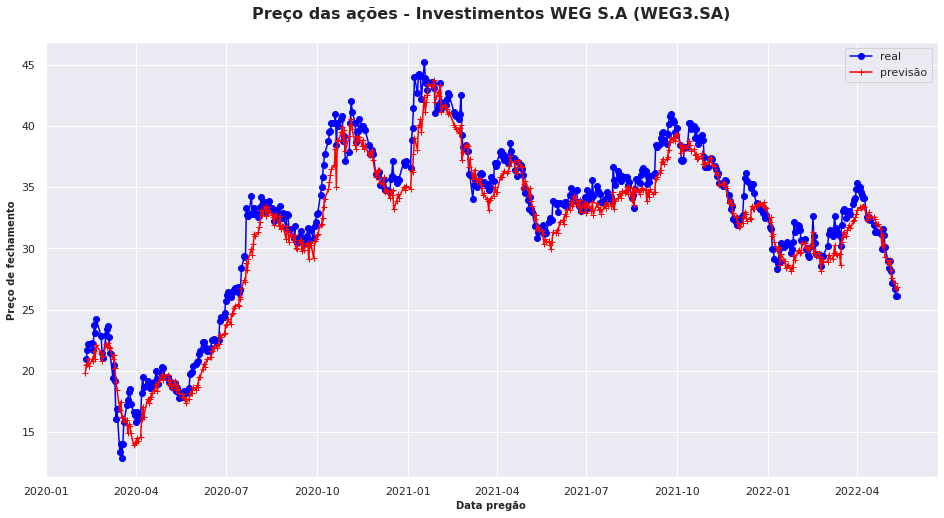

In [128]:
# gráfico dos dados reais e preditos
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos WEG S.A (WEG3.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df['real'], label='real', color='blue', marker='o')
plt.plot(df['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();

In [129]:
# criando uma cópia do dataframe e instanciando no objeto "df2"
df2 = df.copy()
df2.head(20)

,real,previsao
Date,,
2020-02-10,NaN,19.850626
2020-02-11,20.941803,20.439224
2020-02-12,21.676348,20.538523
2020-02-13,22.167665,20.984153
2020-02-14,22.167665,20.412458
2020-02-17,22.269817,20.930584
2020-02-18,21.744450,20.772597
2020-02-19,23.748636,21.583888
2020-02-20,23.101662,20.940726


In [130]:
# resetando o índice
df2.reset_index(inplace=True)
df2

,Date,real,previsao
0,2020-02-10,NaN,19.850626
1,2020-02-11,20.941803,20.439224
2,2020-02-12,21.676348,20.538523
3,2020-02-13,22.167665,20.984153
4,2020-02-14,22.167665,20.412458
...,...,...,...
552,2022-05-05,28.160000,28.260300
553,2022-05-06,27.150000,27.558248
554,2022-05-09,26.660000,27.181484
555,2022-05-10,26.120001,26.651235


In [131]:
# instanciando o recorte de tempo no df3
df3 = df2.loc['2021':] # de 2021 em diante
df3

,Date,real,previsao
203,2020-12-03,36.234688,36.398369
204,2020-12-04,35.190731,35.365008
205,2020-12-07,35.097607,35.302366
206,2020-12-08,35.631836,35.807437
207,2020-12-09,34.798630,34.622784
...,...,...,...
552,2022-05-05,28.160000,28.260300
553,2022-05-06,27.150000,27.558248
554,2022-05-09,26.660000,27.181484
555,2022-05-10,26.120001,26.651235


In [132]:
# visualizando o tipo de dados dos atributos
df3.dtypes

Date        datetime64[ns]
real               float64
previsao           float64
dtype: object

In [133]:
# resetando o índice
df3 = df3.set_index(pd.DatetimeIndex(
    df3['Date'].values
))

# visualizando
df3.head()

,Date,real,previsao
2020-12-03,2020-12-03,36.234688,36.398369
2020-12-04,2020-12-04,35.190731,35.365008
2020-12-07,2020-12-07,35.097607,35.302366
2020-12-08,2020-12-08,35.631836,35.807437
2020-12-09,2020-12-09,34.798630,34.622784


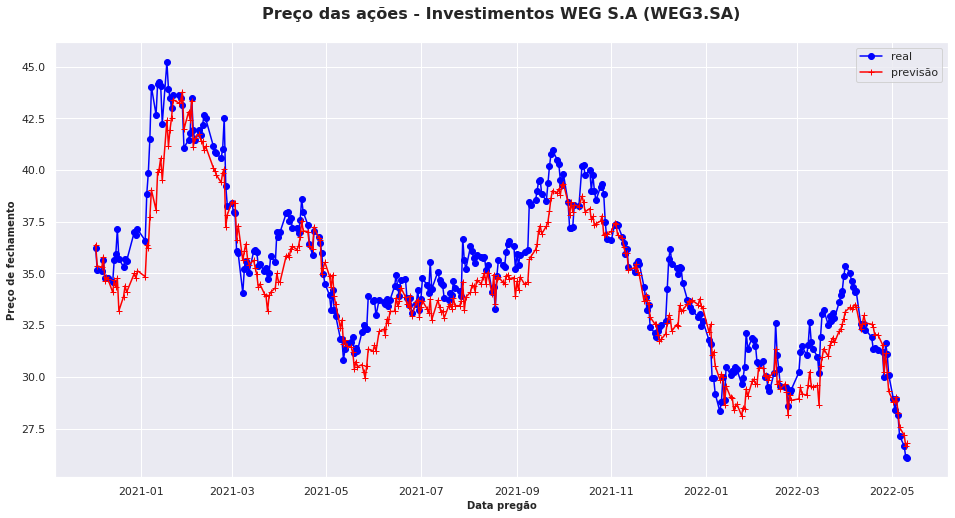

In [134]:
# plotando o gráfico do recorte da série temporal
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos WEG S.A (WEG3.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df3['real'], label='real', color='blue', marker='o')
plt.plot(df3['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();